In [5]:
import string
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import zipfile
from tqdm import tqdm
from scipy.spatial.distance import cosine
from sklearn.manifold import TSNE

Atsisiųskite zip failą: https://www.vdu.lt/cris/bitstreams/16b4afc1-8952-4e84-9e68-30336e2d1fde/download

Failas turi 331203 žodžių vektorių (200 matmenų). Duomenys: Delfi.lt. Daugiau informacijos [čia](https://www.vdu.lt/cris/entities/product/3390c86c-e20e-4b7a-a322-944b807865b5).

In [6]:
zipname = "vectors.zip"
filename = "gensim_glove_vectors.txt"

with zipfile.ZipFile(zipname, 'r') as zip_ref:
    zip_ref.extractall('.')

In [7]:
# užtruks 331205 iteracijas, <1 min.
embeddings = {}
with open(filename, 'r') as f:
  for i, line in tqdm(enumerate(f)):
    if i == 0:
      continue
    values = line.split(' ')
    word = values[0]
    vector = np.array(values[1:], dtype='float32')
    embeddings[word] = vector

len(embeddings)

331205it [00:27, 11978.56it/s]


331204

In [8]:
len(embeddings['labas'])

200

**Užduotys:**

1. Rasti artimiausius žodius šiems žodžiams: "labas", "laba", "sveiki", "sveikas".
   - Atstumo skaičiavimui, naudokite [`cosine()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html) funkciją (jau importuota).
2. Panaudoti paralelogramo modelį ir išspręsti šias lygtis, kiekvienai rasti po 5 artimiausius sprendimus:
   - žmogus - vienas + keli
   - eiti - ėjo + valgė
   - geras - geresnis + blogesnis
   - gydytojas - vyras + moteris
   - prezidentas - vyras + moteris
   - programuotojas - vyras + moteris
   - programuotoja - moteris + vyras
   - medis - obuoliai + serbentai
3. Atvaizduoti kelis įterpinius 2D erdvėje naudojant T-SNE:
   1. Sukurkite [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) modelį (jau importuotas) su žemu perpleksiškumu lygiu (pvz. 5).
   1. Išsirinkite 30-50 žodžius pagal savo nuožiūrą ir surinkite jų įterpinius į vieną sąrašą ar `np.array` objektą. *Rekomenduojama išsirinkti ir kartu sudėti 3 žodžių grupes, pvz. miestai, spalvos ir šeimos nariai.*
   1. Panaudokite TSNE, gaukite koordinates ir atvaizduokite jų sklaidos diagramą su `matplotlib.pyplot` paketu. Prie kiekvieno taško prirašykite atitinkamą žodį (`plt.annotate` ar `plt.text`).

4. Pamatuoti lytinių stereotipų stiprumą naudojant kosinusą kaip matą:
   1. Gaukite krypties vektorių $\vec{d}_l$ tarp "vyras" ir "moteris" įterpinius ($\vec{d} = \vec{a} - \vec{b}$).
   1. Kiekvienam veiksmažodžiui iš žemiau pateikto sąrašo, irgi gaukite krypties vektorių $\vec{d}_p$.
   1. Apskaičiuokite kosinusą tarp gautų krypčių, naudojant skaidrėse minėtą formulę: $\cos(\theta) = \frac{\vec{a} \cdot \vec{b}}{\|\vec{a}\| \times \|\vec{b}\|}$. Vektoriaus ilgiui naudokite `np.linalg.norm()` funkciją, skaliarinei sandaugai - `np.dot()`. Pagalvokite, kaip interpretuoti rezultatą.
   - Veiksmažodžiai: studijuoja, vadovauja, gydo, mokina, uždirba, šoka, gamina, tvarko, masažuoja, prekiauja, dirba, augina, atostogauja, vairuoja, gyvena, valgo, pramogauja. *Galite išsirinkti ir papildomų veiksmažodžių.* Kuris veiksmažodis turi didžiausią šališkumą? Kuris - mažiausią? Pabandyk rasti "moteriškiausią" ir "vyriškiausią" veiksmažodžius visame korpuse.



# 1.

In [24]:
cos_labas = 2
artim_labas = ""
cos_laba = 2
artim_laba = ""
cos_sveiki = 2
artim_sveiki = ""
cos_sveikas = 2
artim_sveikas = ""

for word in embeddings:
    if word != 'labas':
        dist = cosine(embeddings['labas'], embeddings[word])
        if dist <= cos_labas:
            cos_labas = dist
            artim_labas = word
    if word != 'laba':
        dist = cosine(embeddings['laba'], embeddings[word])
        if dist <= cos_laba:
            cos_laba = dist
            artim_laba = word
    if word != 'sveiki':
        dist = cosine(embeddings['sveiki'], embeddings[word])
        if dist <= cos_sveiki:
            cos_sveiki = dist
            artim_sveiki = word
    if word != 'sveikas':
        dist = cosine(embeddings['sveikas'], embeddings[word])
        if dist <= cos_sveikas:
            cos_sveikas = dist
            artim_sveikas = word

print(f"Artimiausias žodis labas: {artim_labas}, Atstumas: {cos_labas}")
print(f"Artimiausias žodis laba: {artim_laba}, Atstumas: {cos_laba}")
print(f"Artimiausias žodis sveiki: {artim_sveiki}, Atstumas: {cos_sveiki}")
print(f"Artimiausias žodis sveikas: {artim_sveikas}, Atstumas: {cos_sveikas}")

Artimiausias žodis labas: rytas, Atstumas: 0.45466291904449463
Artimiausias žodis laba: diena, Atstumas: 0.5204752683639526
Artimiausias žodis sveiki: laimingi, Atstumas: 0.329741895198822
Artimiausias žodis sveikas: gražus, Atstumas: 0.31839144229888916


# 2.

In [38]:
zmogus = embeddings['žmogus'] - embeddings['vienas'] + embeddings['keli']
eiti = embeddings['eiti'] - embeddings['ėjo'] + embeddings['valgė']
geras = embeddings['geras'] - embeddings['geresnis'] + embeddings['blogesnis']
gydytojas = embeddings['gydytojas'] - embeddings['vyras'] + embeddings['moteris']
prezidentas = embeddings['prezidentas'] - embeddings['vyras'] + embeddings['moteris']
programuotojas = embeddings['programuotojas'] - embeddings['vyras'] + embeddings['moteris']
programuotoja = embeddings['programuotoja'] - embeddings['moteris'] + embeddings['vyras']
medis = embeddings['medis'] - embeddings['obuoliai'] + embeddings['serbentai']

lygtys = {
'žmogus': "Žmogus - vienas + kelis",
'eiti': "Eiti - ėjo + valgė",
'geras': "Geras - geresnis + blogesnis",
'gydytojas': "Gydytojas - vyras + moteris",
'prezidentas': "Prezidentas - vyras + moteris",
'programuotojas': "Programuotojas - vyras + moteris",
'programuotoja': "Programuotoja - moteris + vyras",
'medis': "Medis - obuoliai + serbentai"
}

zodynas = {
    'žmogus': zmogus,
    'eiti': eiti,
    'geras': geras,
    'gydytojas': gydytojas,
    'prezidentas': prezidentas,
    'programuotojas': programuotojas,
    'programuotoja': programuotoja,
    'medis': medis
}
for zodis in zodynas:
    distance = 2
    artim_zodis = {}
    for word in embeddings:
        if zodis != word:
            dist = cosine(zodynas[zodis], embeddings[word])
            if dist <= distance:
                distance = dist
                artim_zodis[word] = distance
    artim_zodis = dict(sorted(artim_zodis.items(), key=lambda item: item[1]))
    print(f"Lygtis: {lygtys[zodis]}")
    print(f"Lygties rezultatas: {list(artim_zodis.keys())[:5]}\n")

Lygtis: Žmogus - vienas + kelis
Lygties rezultatas: ['žmonės', 'net', 'jie', 'gali', 'kai']

Lygtis: Eiti - ėjo + valgė
Lygties rezultatas: ['valgyti', 'daryti', 'nori', 'ką', 'jei']

Lygtis: Geras - geresnis + blogesnis
Lygties rezultatas: ['blogas', 'puikus', 'dalykas', 'mums', 'nėra']

Lygtis: Gydytojas - vyras + moteris
Lygties rezultatas: ['gydytoja', 'gydytojai', 'specialistė', 'pataria', 'moteris']

Lygtis: Prezidentas - vyras + moteris
Lygties rezultatas: ['prezidentė', 'pareiškė', 'ukrainos', 'sakė', 'lietuvos']

Lygtis: Programuotojas - vyras + moteris
Lygties rezultatas: ['garsi', 'jauna', 'moteris', 'viena', 'kuri']

Lygtis: Programuotoja - moteris + vyras
Lygties rezultatas: ['pustuštis', 'neįgalus', 'suimtas', 'įtariamasis', 'sulaikytas']

Lygtis: Medis - obuoliai + serbentai
Lygties rezultatas: ['serbentai', 'patriotas', 'sovietinis', 'vienišas', 'kaimas']



# 3.

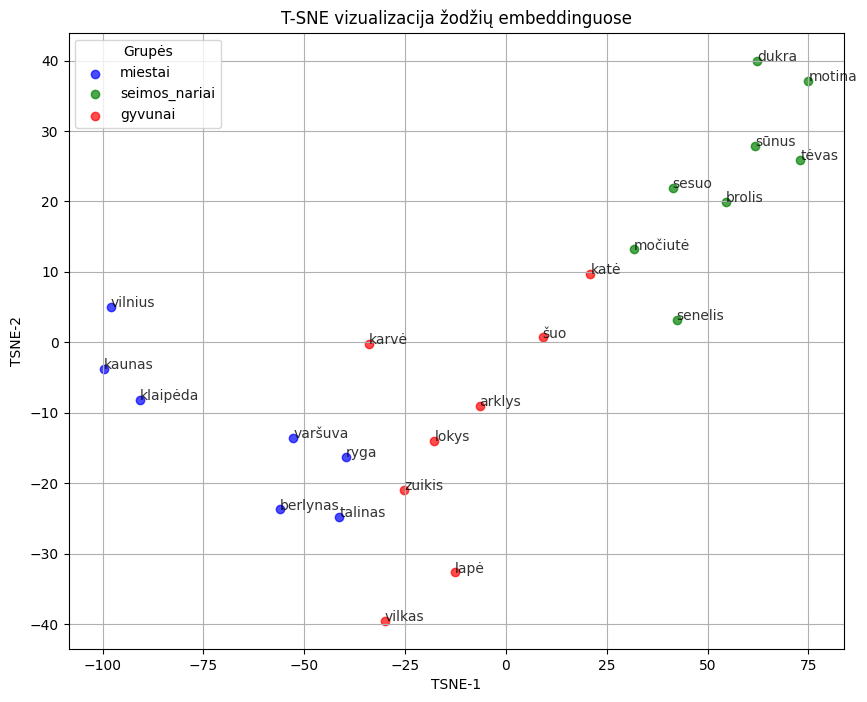

In [68]:
miestai = ['vilnius', 'kaunas', 'klaipėda', 'ryga', 'talinas', 'varšuva', 'berlynas']
seimos_nariai = ['tėvas', 'motina', 'sūnus', 'dukra', 'brolis', 'sesuo', 'senelis', 'močiutė']
gyvunai = ['šuo', 'katė', 'arklys', 'karvė', 'vilkas', 'lapė', 'lokys', 'zuikis']

words = miestai + seimos_nariai + gyvunai

vectors = []
valid_words = []
for w in words:
    if w in embeddings:
        vectors.append(embeddings[w])
        valid_words.append(w)
vectors = np.array(vectors)

tsne = TSNE(n_components=2, perplexity=5, random_state = 42)
vectors_2d = tsne.fit_transform(vectors)


colors = {
    "miestai": "blue",
    "seimos_nariai": "green",
    "gyvunai": "red"
}

groups = {
    "miestai": miestai,
    "seimos_nariai": seimos_nariai,
    "gyvunai": gyvunai
}

plt.figure(figsize=(10, 8))

for group_name, group_words in groups.items():
    group_vectors = []
    group_labels = []

    for w in group_words:
        if w in valid_words:
            idx = valid_words.index(w)
            group_vectors.append(vectors_2d[idx])
            group_labels.append(w)

    group_vectors = np.array(group_vectors)

    plt.scatter(group_vectors[:, 0], group_vectors[:, 1],
                color=colors[group_name],
                label=group_name,
                alpha=0.7)

    for i, word in enumerate(group_labels):
        plt.annotate(word, (group_vectors[i, 0], group_vectors[i, 1]),
                     fontsize=10, alpha=0.8)

plt.title("T-SNE vizualizacija žodžių embeddinguose")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.legend(title="Grupės")
plt.grid(True)
plt.show()

# 4.

In [63]:
verbs = [
"studijuoja", "vadovauja", "gydo", "mokina", "uždirba",
"šoka", "gamina", "tvarko", "masažuoja", "prekiauja",
"dirba", "augina", "atostogauja", "vairuoja", "gyvena",
"valgo", "pramogauja", "vadovauja", "aiškina", "gamina", "gimdo",
"rėkia", "muša", "glosto", "verkia"
]

verbs = [v for v in verbs if v in embeddings]

d_l = embeddings["moteris"] - embeddings["vyras"]

d_l_norm = d_l / np.linalg.norm(d_l)

results = {}

for v in verbs:
    d_p = embeddings[v]

    cos_theta = np.dot(d_l_norm, d_p) / (np.linalg.norm(d_p))
    results[v] = cos_theta

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("Moteriškiausi“ veiksmažodžiai:")
for w, score in sorted_results[:5]:
    print(f"{w}: {score:.2f}")
print("\n")

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=False)

print("Vyriškiausi veiksmažodžiai:")
for w, score in sorted_results[:5]:
    print(f"{w}: {score:.2f}")

Moteriškiausi“ veiksmažodžiai:
gimdo: 0.18
gydo: 0.14
gamina: 0.12
masažuoja: 0.11
augina: 0.09


Vyriškiausi veiksmažodžiai:
rėkia: -0.14
muša: -0.12
vadovauja: -0.11
uždirba: -0.09
verkia: -0.09
